### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

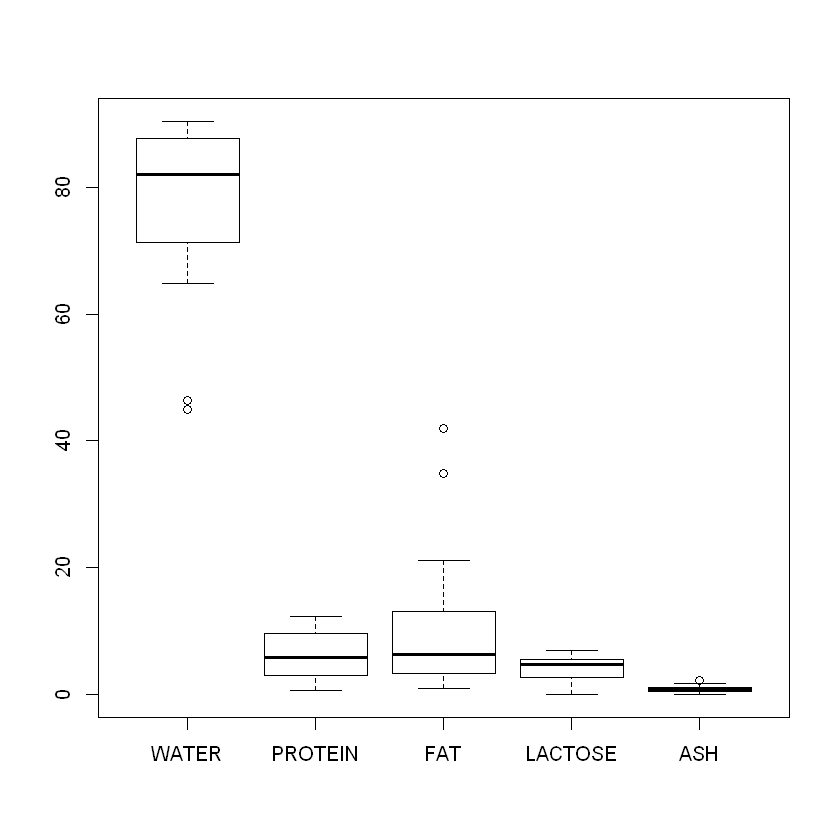

In [3]:
# library(cluster)
# library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

**Descripción de los datos y porque realizar un análisis de agrupamiento**

Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio, el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

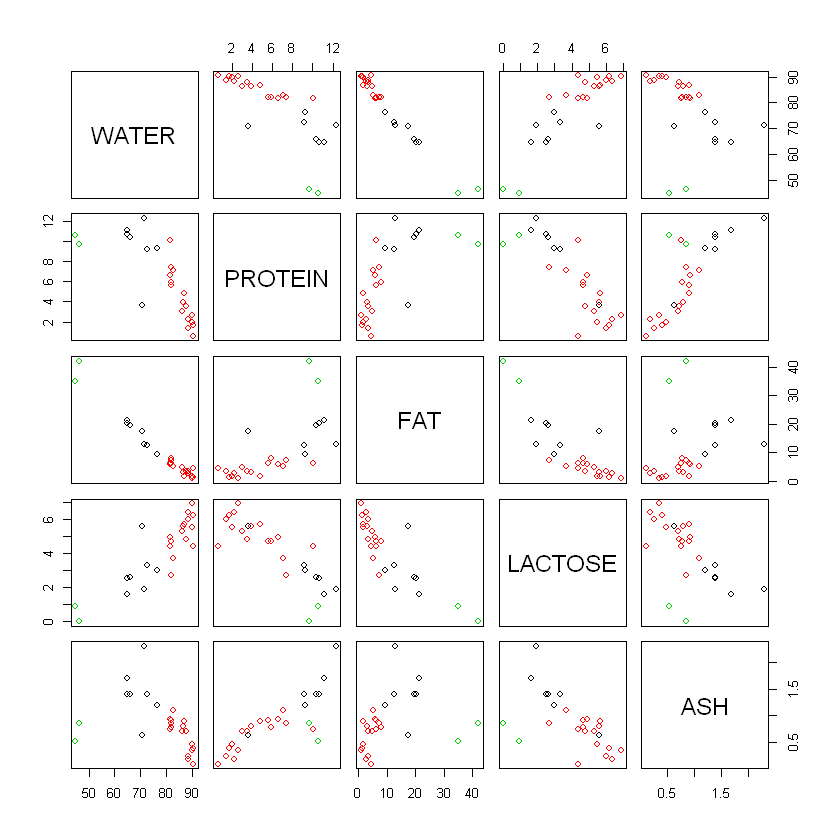

In [4]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)


Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo rojo (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo negro, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo verde, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 

Within cluster sum of squares by cluster:
[1] 299.9911 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

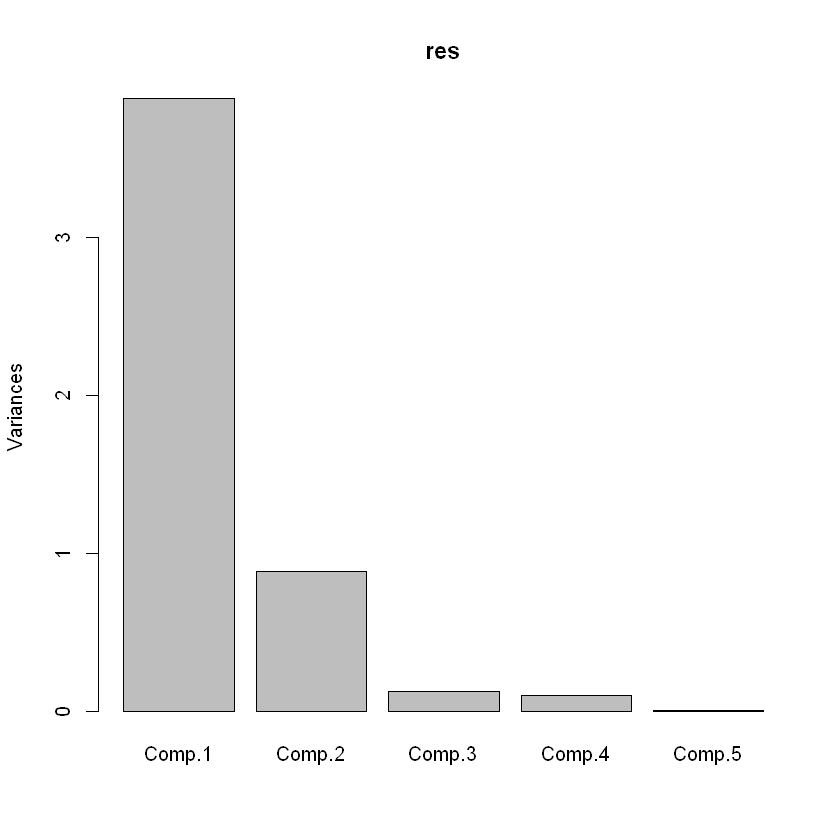

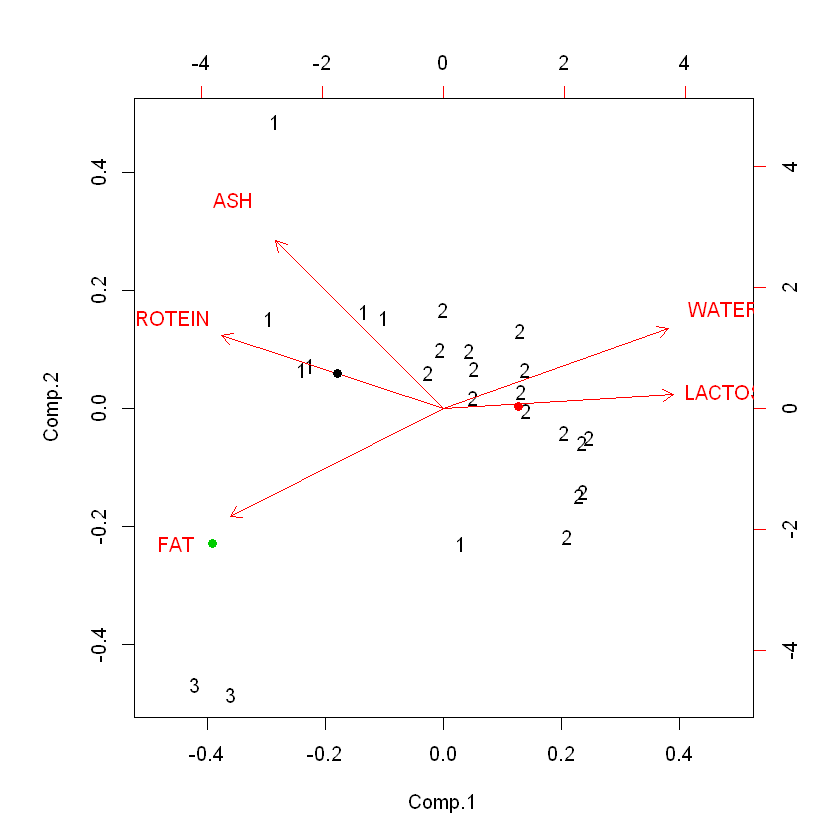

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 3 representa a los individuos con mayores valores de FAT, mientras corresponde a los mamíferos con mayores porcentajes de agua y lactosa y por otra parte el grupo 2 contiene mamíferos con mayores porcentajes de proteína y calcio (a excepción de un caso).

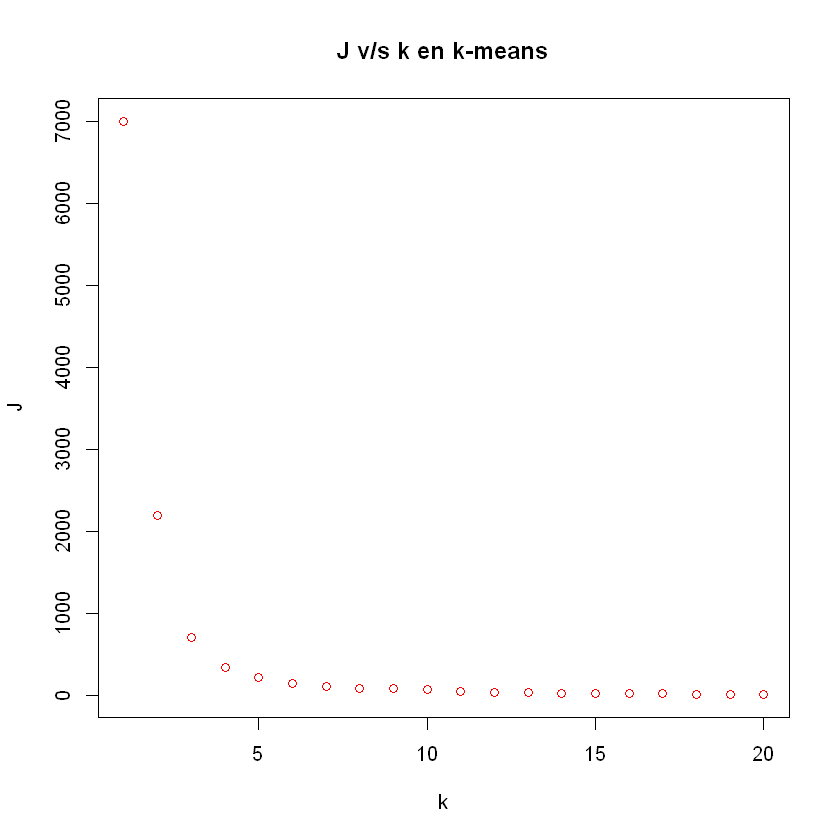

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J <- rep(0,20)
fin_iter <- 20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}

#Grafica
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 1:** 
1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.
2. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

In [7]:
J <- rep(0,20)
fin_iter <- 20
#hasta donde la funcion de perdida va decreciendo

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=2000,nstart=10)
	J[k]<-cl$tot.withinss
}

In [8]:
#       (1.1)

# De acuerdo al gráfico y considerando la "forma de codo" el valor más apropiado se encuentra entre K = 3 y K = 4
# En término del costo que supone agregar 1 a K es más llamativo K = 3, ya que su rendimiento no parece mejorar tanto desde K = 3 a K = 4,
# Como lo hace de K = 1 hacia K = 2, o desde K = 2 hacia K = 3;

# Por esos motivos, consideramos K = 3  como el más apropiado


#       (1.1)

# Planteamiento: Dado que la Función de pérdida va disminuyendo a medida que K aumenta
# Debemos crear una función capaz de discernir una diferencia optima con los datos dados,
# para ello recorreremos en completitud el arreglo dado, ya que al tratarse de un 'mejor valor'
# debemos recorrer todo para estar seguros que es el optimo, pese a saber que si K es creciente,
# la función de perdida disminuye.

# Para el codigo consideraremos la misma variable que se usó para graficar
# cluster$tot.withinss

# Basicamente es la suma de cuadrados de forma conjunta de los grupos
# De esta forma, mientras mayor es el valor de cluster$tot.withinss, sabremos que estamos lejos de un optimo
# Ya que representa la distancia de los grupos frente a la 'X' que rodean, siendo 'X' un punto de referencia para la agrupacion


# Considerando las declaraciones de variables anteriores tenemos:
# Arreglo J relleno con valores de funcion de pérdida, de largo 20, con K = i; tal que i es ascendente [1,20]
fin_iter <- 20

difJ <- rep (1,20) # Almacenará las diferencias de J, dejando la primera celda sin usar

# Sabemos que J[1] > J[2]
# Buscamos dejar difJ de forma: [ /, J[1] - J[2], J[2] - J[3], ... , J[k-1]-J[k]]
difJ[2] <- J[1] - J[2]

ratio <- rep(0,20) # Almacenará el ratio o disparidad, dependerá de difJ[k-1]/difJ[k]  ; K = 3 -> (J[1] - J[2]) / (J[2] - J[3])
ratio[2] <- difJ[1]/difJ[2]
# Nosotros buscamos una diferencia importante con respecto a las diferencias anteriores
# Esto significaria que ratio[k], sea el ratio más grande entre todas las diferencias generadas

k_optimo <- 1
ratio_Actual <- 1

k_selected <- rep(0,20)
i<-1

for (k in 3:fin_iter){
    
    # Calculamos la diferencia descrita antes
    difJ[k] <- J[k-1]-J[k]
    
    # Mientras exista una diferencia de J[k-1] - J[k] > 0 ; J[k-1] > J[k] ; que sea positiva
    # También dado la gráfica, a medida que k asciende hay valores de J no garantizan lo anterior

    if( (difJ[k] > 0) && (ratio[k-1] > 0) ){
        
        # Aprovechando el comportamiento del grafico (mientras k aumenta J disminuye)
        # Si se descubre que el valor medio de entre 3 valores ya calculados se tratá de un máximo (esto es un pick pequeño)
        # Entonces se regula 
        # Ej: J[17] = 14.38805 J[18] = 7.35305000000001 J[19] = 11.4049833333333
        if ( ( (J[k-2] < J[k-1]) && (J[k-1] > J[k]) ) || ( (difJ[k-2] < difJ[k-1]) && (difJ[k-1] > difJ[k]) ) ){
            ratio[k-1] <- 1
            ratio[k] <- 1
        }
        #Si la curva permanece drececiente, entonces hace el calculo normal
        else{

            #Calcula el nuevo ratio
            ratio[k] <- difJ[k-1]/difJ[k]

            if (ratio[k] > ratio_Actual){
                print(c(difJ[k-2],difJ[k-1],difJ[k]))
                ratio_Actual <- ratio[k]
                k_optimo <- k-1
                k_selected[i] <- k_optimo
                i <- i+1
            }
        }
    }else{break}    
}

print(paste("J: ",J))
print(paste("difJ",difJ))
print(paste("ratio",ratio))
print(k_selected)

print(paste("El valor de k más optimo es : ", k_optimo))


[1] 4818.2662 1482.4192  362.5183
[1] 31.590708 27.191200  5.971547
[1] 8.5152617 3.5315833 0.3814667
 [1] "J:  7005.089144"      "J:  2186.82291397059" "J:  704.403725892857"
 [4] "J:  341.885447619048" "J:  212.504458333333" "J:  141.106116666667"
 [7] "J:  109.515408333333" "J:  82.3242083333333" "J:  76.3526616666667"
[10] "J:  72.6658666666667" "J:  44.67512"         "J:  38.3444666666667"
[13] "J:  30.835245"        "J:  22.3199833333334" "J:  18.7884"         
[16] "J:  18.4069333333334" "J:  10.5393"          "J:  13.9125166666667"
[19] "J:  7.88225"          "J:  4.36998333333334"
 [1] "difJ 1"                 "difJ 4818.26623002941"  "difJ 1482.41918807773" 
 [4] "difJ 362.51827827381"   "difJ 129.380989285714"  "difJ 71.3983416666667" 
 [7] "difJ 31.5907083333333"  "difJ 27.1912"           "difJ 5.97154666666664" 
[10] "difJ 3.686795"          "difJ 27.9907466666667"  "difJ 6.33065333333332" 
[13] "difJ 7.50922166666667"  "difJ 8.51526166666667"  "difJ 3.53158333333333" 
[16

In [9]:
#Utilizando el k optimo obtenido anteriormente:
cl<-kmeans(datos,3,iter.max=1000,nstart=10)
print(cl$cluster)
apply(datos[cl$cluster==1,],2,summary)
apply(datos[cl$cluster==2,],2,summary)
apply(datos[cl$cluster==3,],2,summary)


     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,64.80000,3.600000,9.50000,1.600000,0.630000
1st Qu.,65.35000,9.250000,12.85000,2.200000,1.300000
Median,70.70000,10.400000,17.60000,2.600000,1.400000
Mean,69.47143,9.514286,16.28571,2.928571,1.432857
3rd Qu.,71.90000,10.900000,20.00000,3.150000,1.550000
Max.,76.30000,12.300000,21.20000,5.600000,2.300000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,81.6000,0.600,1.000,2.70000,0.100000
1st Qu.,82.0750,2.150,2.475,4.62500,0.387500
Median,86.7000,3.700,4.000,5.10000,0.730000
Mean,86.0625,4.275,4.175,5.11875,0.635625
3rd Qu.,88.8750,6.075,6.000,5.77500,0.862500
Max.,90.4000,10.100,7.900,6.90000,1.100000


,WATER,PROTEIN,FAT,LACTOSE,ASH
Min.,44.900,9.700,34.900,0.000,0.53
1st Qu.,45.275,9.925,36.675,0.225,0.61
Median,45.650,10.150,38.450,0.450,0.69
Mean,45.650,10.150,38.450,0.450,0.69
3rd Qu.,46.025,10.375,40.225,0.675,0.77
Max.,46.400,10.600,42.000,0.900,0.85


K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 

Within cluster sum of squares by cluster:
[1] 299.9911 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

[1] 25  5

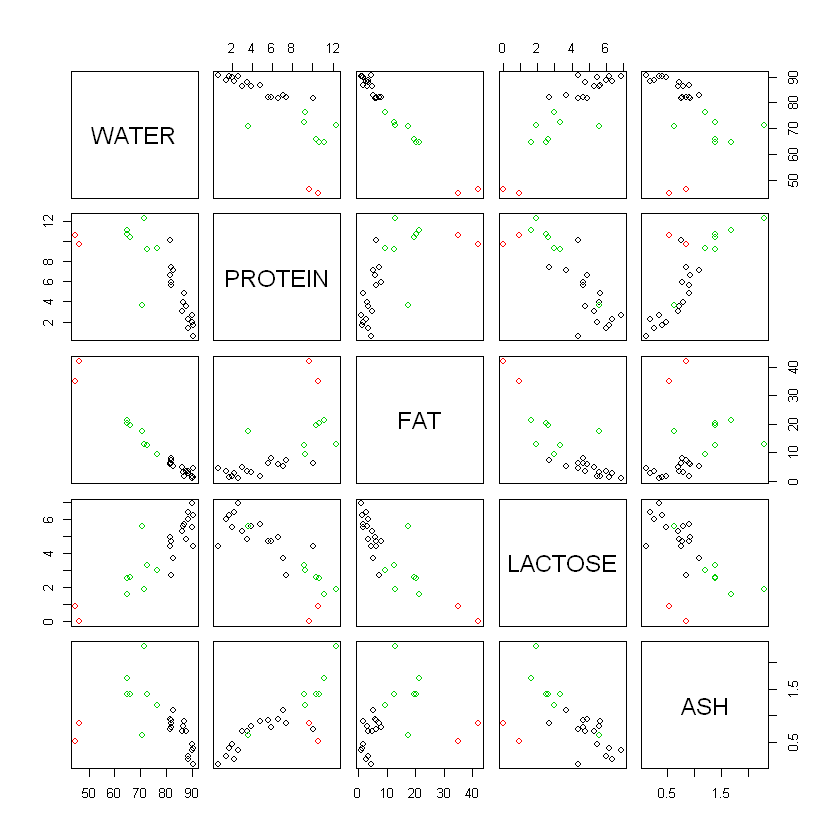

In [10]:
#       (1.2)

# Caracterizar los datos
# cl$cluster muestra a qué grupo pertenecen los datos
cl # muestra toda la info

# NOTA: ESTA INFORMACIÓN PUEDE CAMBIAR SEGÚN LA EJECUCIÓN YA QUE DEPENDE DE UN VALOR ALEATORIO
# AUNQUE LOS DATOS DEBIESEN, GENERALMENTE, MANTENERSE EN LOS MISMOS GRUPOS (puede que su número de grupo cambie)

#        DOG   ELEPHANT     RABBIT        RAT       DEER    REINDEER      WHALE
#          1          1          1          1          1           1          1       
    

#       SEAL    DOLPHIN 
#          2          2 

#      HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
#          3          3          3          3          3          3          3 
#    BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
#          3          3          3          3          3          3          3 
#      ZEBRA      SHEEP       
#          3          3       

#      WATER   PROTEIN      FAT  LACTOSE      ASH
# 1 69.47143  9.514286 16.28571 2.928571 1.432857
# 2 45.65000 10.150000 38.45000 0.450000 0.690000
# 3 86.06250  4.275000  4.17500 5.118750 0.635625

# Los valores más cambiantes (en base al boxplot) son Agua, Grasa y Proteina

# 2 animales
# Considerando el grupo más pequeño son Seal y Dolphin, podemos observar que en todos los datos se encuentran más alejados del resto de animales
# Siendo el grupo con menor porcentaje de Agua con 45.65% y mayor Grasa con 38.45%
# También corresponden al grupo con mayor % de Proteina, siendo levemente superior al 2do puesto, con un 10.15%

# En el segundo grupo por tamaño, (Dog, Elephant, rabbit, rat, deer, reindeer, whale) - 7 animales
# Tenemos que están en 2do lugar en % de Agua (69.47%), Proteina (9.5%) y Grasa (16.28%)
# Esta información acompañada del gráfico pairs podemos ver que este grupo
# Aproximadamente tiene los siguientes porcentajes:
# Los porcentajes de Agua fluctúan por un 60 y 78 porciento
# Los porcentajes de Proteina fluctúan por un 8 a 12 porciento
# Los porcentajes de Grasa entre un 10 y 23 porciento

# En el tercer grupo por tamaño tenemos cerca de 16 aniamles
# Los cuales muestran una clara tendencia en % de Agua, siendo el mayor grupo con valores que fluctúan entre el 80 y 95 porciento, bastante superior a los anteriores
# Los valores de Porteina son bastante más bajo, siendo el peor entre los 3 grupos, con valores entre 1 y 10 porciento, con mayor concentración de valores cercano al 3 y 4%
# En cuanto a la Grasa es el grupo con menor % de grasa, en promedio con 4.17%, 12 % menos que el grupo con mayor % de grasa. Y los porcentajes de grasa varian entre 1 y 10 porciento

# De toda esta información se puede asegurar que hay distinciones claras entre los grupos
# Como datos los más significativos son % de Agua y % de Grasa, la Proteina no permite diferenciar del todo al grupo más pequeño y mediano
# Y aunque no se consideró, la Lactosa puede ser una variable a evaluar dado que en el gráfico si se puede ver una distinción entre estos grupos

#Reutilizando el código dado,
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)
dim(datos)
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)


**Ejercicio 2:** Realice un análisis de clustering con un subconjunto de datos de comunas.csv (puede escoger variables (al menos 5) y comunas (al menos 30) indicando el criterio utilizado en su elección.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [11]:
#       (2.0) y parte de la (2.1)

# Lectura de datos e información filtrada 'comunas.csv'
# Nota: Se editaron algunos nombres de ciudad modificando 'ñ' y tildes

# Leemos la data y seteamos las Ciudades como nombres de Fila
datos <- read.csv("comunas.csv", row.names = 2 ,header=TRUE,sep=";",dec=".")
dim(datos)
head(datos)

# Arbitrariamente editamos la data para dejar 5 variables de posible interés y relación
# Población miles, IDSE, Ingreso per. cap miles, Pobreza, Escolaridad, Indice de desarrollo humano

# Estas variables se escogieron por sobre las demás porque posiblemente tengan un mayor impacto y relaciones entre sí
# Por ejemplo la mortalidad y nacimiento no es tan relevante a comparación de los demás datos, aunque todo depende del interés de estudio


datos <- datos[,c(2,3,4,5,6,10)]
dim(datos)
head(datos)

# Ahora seleccionamos poblaciones con Población mayor a 100 en miles
# Esto para seleccionar ciudades 'grandes'
datos <- datos[datos[,1] >=100,]

dim(datos)
head(datos)

[1] 323  13

,Region,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Iquique,1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
Pica,1,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
Pozo Almonte,1,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
Alto Hospicio,1,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
Huara,1,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
Calama,2,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


[1] 323   6

,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Iquique,186.0,0.698,227.6,10.2,11.1,0.631
Pica,18.6,0.604,188.1,12.2,9.6,0.572
Pozo Almonte,17.3,0.591,176.0,9.8,9.7,0.574
Alto Hospicio,93.8,0.577,166.3,20.9,10.1,0.555
Huara,3.4,0.382,161.4,10.0,7.6,0.592
Calama,148.8,0.717,269.3,8.5,10.9,0.625


[1] 48  6

,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Iquique,186.0,0.698,227.6,10.2,11.1,0.631
Calama,148.8,0.717,269.3,8.5,10.9,0.625
Antofagasta,373.0,0.714,256.5,7.1,11.0,0.627
Copiapo,163.9,0.671,219.4,14.5,10.7,0.609
La Serena,214.7,0.669,194.3,14.5,10.6,0.619
Coquimbo,215.1,0.657,183.1,13.0,10.4,0.620


 Poblacion..miles..2011      IDSE       
 Min.   :107.2          Min.   :0.5190  
 1st Qu.:129.8          1st Qu.:0.6228  
 Median :169.9          Median :0.6650  
 Mean   :207.9          Mean   :0.6750  
 3rd Qu.:246.7          3rd Qu.:0.6965  
 Max.   :735.4          Max.   :0.9700  
 Ingreso.per.cï..p..Mens..miles....2006.11 Pobreza...2006.11
 Min.   :134.1                             Min.   : 1.30    
 1st Qu.:176.6                             1st Qu.:10.18    
 Median :205.0                             Median :13.30    
 Mean   :252.6                             Mean   :13.37    
 3rd Qu.:238.3                             3rd Qu.:17.20    
 Max.   :966.7                             Max.   :23.70    
 Escolaridad..aï..os..2006.11 X.ndice.Desarrollo.Humano
 Min.   : 8.90                Min.   :0.4820           
 1st Qu.:10.07                1st Qu.:0.5507           
 Median :10.60                Median :0.6050           
 Mean   :10.81                Mean   :0.6165           
 3rd Q

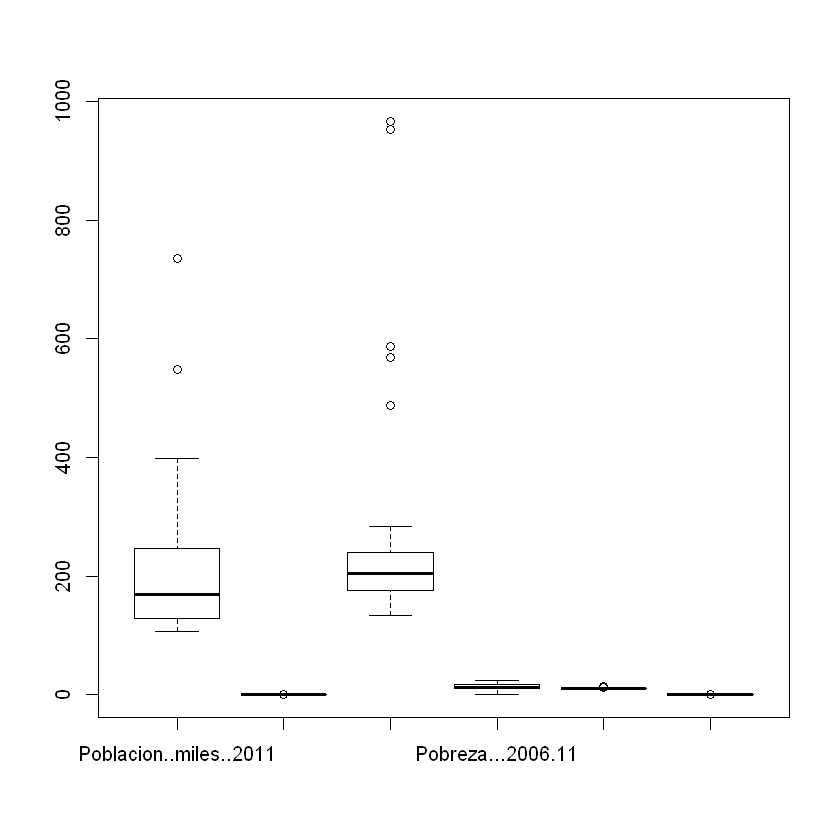

In [12]:
# Echamos un vistazo a la información
summary(datos)
boxplot(datos)

[1] 2.930116

[1] 1.948841

[1] 1.510849

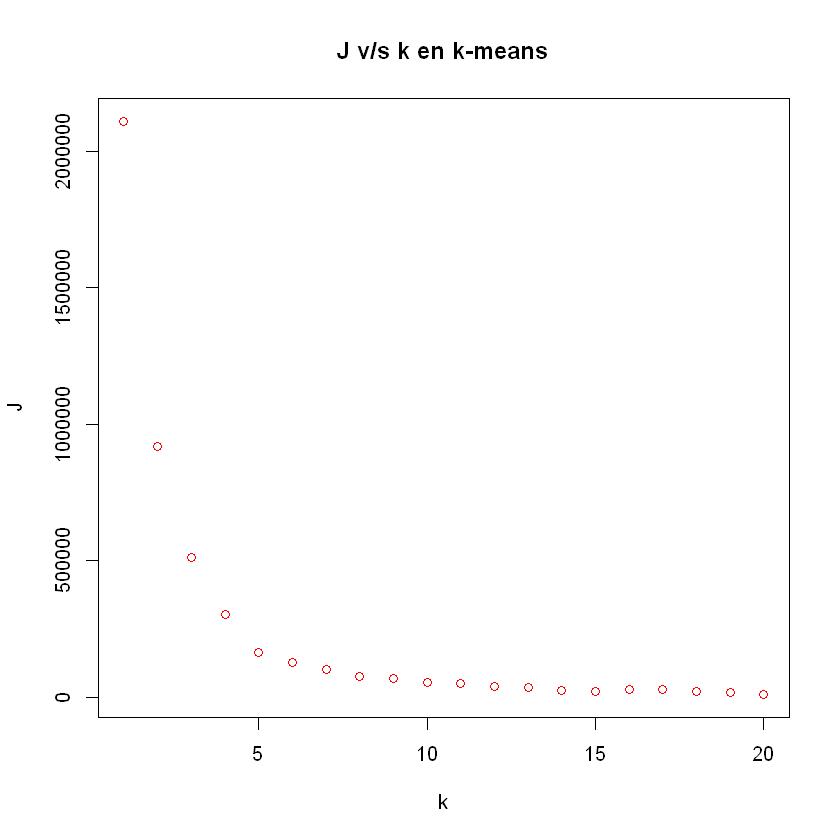

In [13]:
J <- rep(0,20)
fin_iter <- 20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}

#Grafica
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

# Valores diferencia y su relacion ; el mayor de los valores se da cuando K = 3
(J[1] - J[2]) /  (J[2] - J[3]) # K = 3 
(J[2] - J[3]) /  (J[3] - J[4]) # K = 4
(J[3] - J[4]) /  (J[4] - J[5]) # K = 5


In [14]:
J <- rep(0,20)
fin_iter <- 20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	J[k]<-cl$tot.withinss
}

fin_iter <- 20

difJ <- rep (1,20) # Almacenará las diferencias de J, dejando la primera celda sin usar

# Sabemos que J[1] > J[2]
# Buscamos dejar difJ de forma: [ /, J[1] - J[2], J[2] - J[3], ... , J[k-1]-J[k]]
difJ[2] <- J[1] - J[2]

ratio <- rep(0,20) # Almacenará el ratio o disparidad, dependerá de difJ[k-1]/difJ[k]  ; K = 3 -> (J[1] - J[2]) / (J[2] - J[3])
ratio[2] <- difJ[1]/difJ[2]
# Nosotros buscamos una diferencia importante con respecto a las diferencias anteriores
# Esto significaria que ratio[k], sea el ratio más grande entre todas las diferencias generadas

k_optimo <- 1
ratio_Actual <- 1

k_selected <- rep(0,20)
i<-1

for (k in 3:fin_iter){
    
    # Calculamos la diferencia descrita antes
    difJ[k] <- J[k-1]-J[k]
    
    # Mientras exista una diferencia de J[k-1] - J[k] > 0 ; J[k-1] > J[k] ; que sea positiva
    # También dado la gráfica, a medida que k asciende hay valores de J no garantizan lo anterior

    if( (difJ[k] > 0) && (ratio[k-1] > 0) ){
        
        # Aprovechando el comportamiento del grafico (mientras k aumenta J disminuye)
        # Si se descubre que el valor medio de entre 3 valores ya calculados se tratá de un máximo (esto es un pick pequeño)
        # Entonces se regula 
        # Ej: J[17] = 14.38805 J[18] = 7.35305000000001 J[19] = 11.4049833333333
        if ( ( (J[k-2] < J[k-1]) && (J[k-1] > J[k]) ) || ( (difJ[k-2] < difJ[k-1]) && (difJ[k-1] > difJ[k]) ) ){
            ratio[k-1] <- 1
            ratio[k] <- 1
        }
        #Si la curva permanece drececiente, entonces hace el calculo normal
        else{

            #Calcula el nuevo ratio
            ratio[k] <- difJ[k-1]/difJ[k]

            if (ratio[k] > ratio_Actual){
                print(c(difJ[k-2],difJ[k-1],difJ[k]))
                ratio_Actual <- ratio[k]
                k_optimo <- k-1
                k_selected[i] <- k_optimo
                i <- i+1
            }
        }
    }else{break}    
}

print(J)
print(ratio)
print(k_selected)
print(paste("K optimo seleccionado es: ",k_optimo))

[1] 1192651.2  407032.0  208858.5
[1] 208858.48 138239.17  35657.44
 [1] 2110529.70  917878.51  510846.50  301988.02  163748.85  128091.41
 [7]   99886.73   77280.88   65403.78   61447.55   48215.40   45051.24
[13]   28096.65   33220.20   21451.97   24654.86   26572.40   15318.50
[19]   23374.44   25496.95
 [1] 0.0000000 1.0000000 1.0000000 1.9488413 1.5108488 3.8768675 1.2642383
 [8] 1.2476715 1.9033156 3.0021179 1.0000000 1.0000000 0.1866257 0.0000000
[15] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [1] 3 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1] "K optimo seleccionado es:  5"


Iquique             Calama        Antofagasta            Copiapo 
                 3                  3                  1                  3 
         La Serena           Coquimbo             Ovalle            Quilpu? 
                 3                  3                  3                  3 
      Vina del Mar      Villa Alemana         Valparaiso           Rancagua 
                 3                  3                  3                  3 
            Curico              Talca        Chiguayante       Concepciï¿½n 
                 3                  3                  3                  3 
        Talcahuano            Chillan        Los Angeles            Coronel 
                 3                  3                  3                  3 
            Temuco       Puerto Montt             Osorno       Punta Arenas 
                 3                  3                  3                  3 
        Las Condes        Providencia              Nunoa           Santiago 
                 2                  2                  2                  2 
      Lo Barnechea         La Florida              Maipu          Quilicura 
                 2                  1                  1                  3 
Estaciï¿½n Central        Puente Alto          Penalolen           Pudahuel 
                 3                  1                  3                  3 
            Colina         Conchalï¿½           Recoleta          El Bosque 
                 3                  3                  3                  3 
      San Bernardo              Renca          La Granja          Melipilla 
                 3                  3                  3                  3 
       Cerro Navia         La Pintana           Valdivia              Arica 
                 3                  3                  3                  3

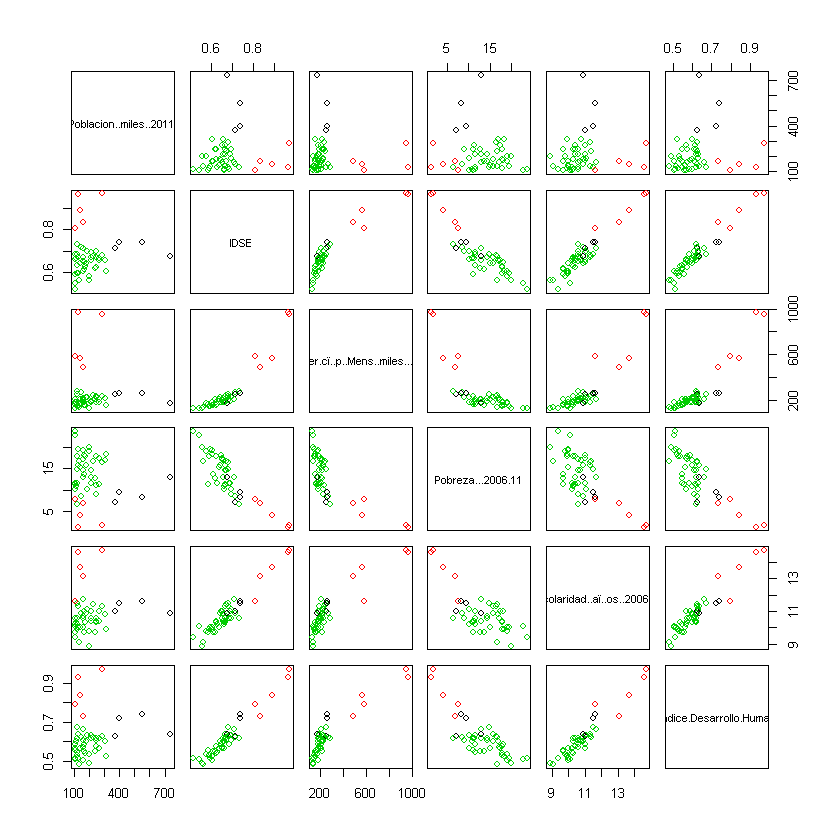

In [15]:
#       (2.1)

# El realizar un clustering de estos datos, quizás considerando todas las variables no sea muy pertinente
# dado que son cerca de 13 variables y + 300 datos

# Pero al filtrar los datos según cierto conocimiento previo de la información puede llegar a ser coherente
# la realización del clustering
# En el caso de los datos seleccionados son los siguientes:
# Población miles, IDSE, Ingreso per. cap miles, Pobreza, Escolaridad, Indice de desarrollo humano

# De estos, sin revisar los datos numéricos de cada uno se pueden estimar ciertas relaciones bajo intuición
# Lo que posteriormente se podrá ver graficado y agrupado

#       (2.2)

# En base al gráfico anterior y el pequeño cálculo de las diferencias mostrando como un print,
# Podemos decir que el óptimo es K = 3

#Valor inicial k
k0=3

#Creando clustering K = 3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

#Para saber qué ciudad corresponde a cada grupo: cl$cluster
cl$cluster

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6 
2.1146671 1.0051303 0.5942480 0.3373713 0.1931167 0.1168423 

 6  variables and  48 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1.1332284,2.6236721,-0.300972466,-0.04248778,-0.056595275,0.035796628
5.1145553,-0.7512421,0.306024632,0.21324650,0.028090609,-0.017055169
-0.7719408,-0.1727815,-0.008364956,-0.02298157,0.002203284,-0.001484889


K-means clustering with 3 clusters of sizes 4, 5, 39

Cluster means:
  Poblacion..miles..2011      IDSE Ingreso.per.cï..p..Mens..miles....2006.11
1               513.9000 0.7180000                                  238.4000
2               166.6800 0.8944000                                  712.8800
3               181.8154 0.6424872                                  194.9974
  Pobreza...2006.11 Escolaridad..aï..os..2006.11 X.ndice.Desarrollo.Humano
1           9.45000                     11.25000                 0.6810000
2           4.34000                     13.54000                 0.8540000
3          14.93077                     10.41795                 0.5794615

Clustering vector:
           Iquique             Calama        Antofagasta            Copiapo 
                 3                  3                  1                  3 
         La Serena           Coquimbo             Ovalle            Quilpu? 
                 3                  3                  3                

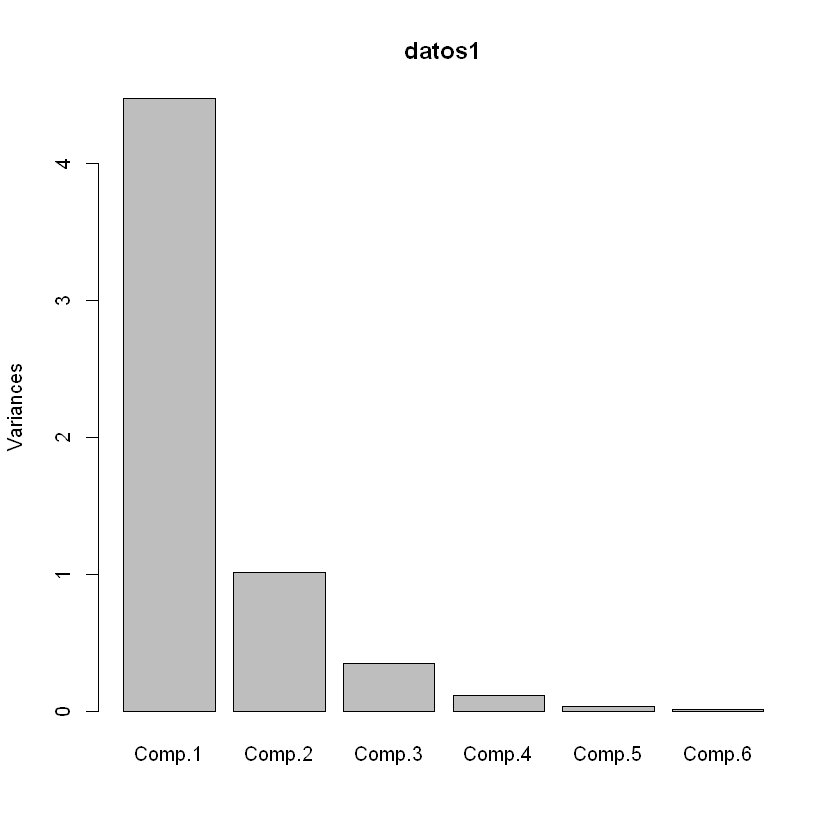

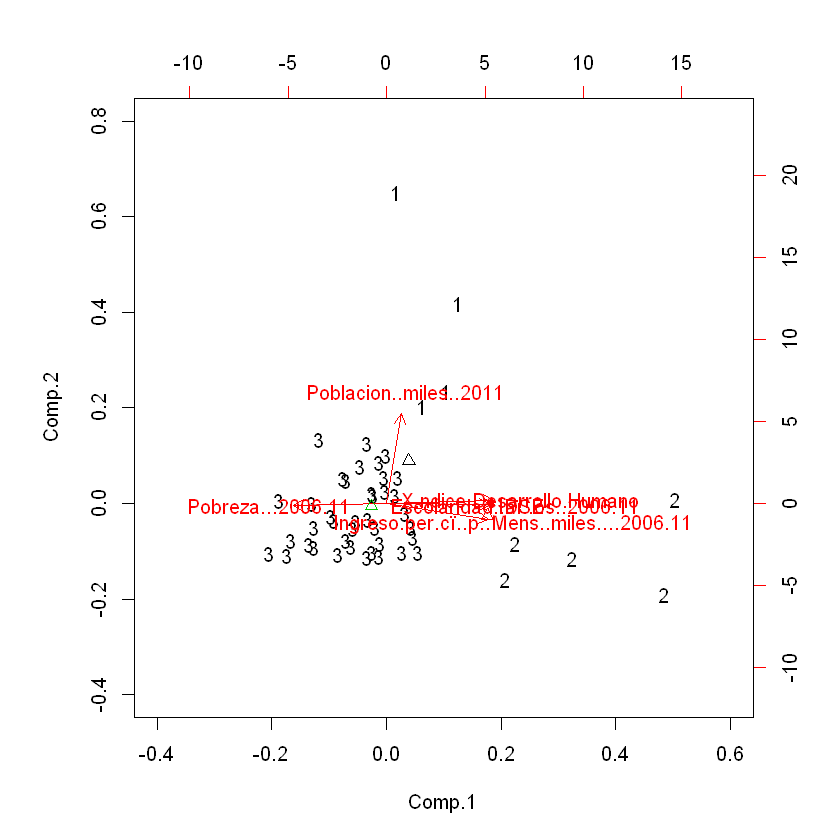

biplot                  package:stats                  R Documentation

_B_i_p_l_o_t _o_f _M_u_l_t_i_v_a_r_i_a_t_e _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Plot a biplot on the current graphics device.

_U_s_a_g_e:

     biplot(x, ...)
     
     ## Default S3 method:
     biplot(x, y, var.axes = TRUE, col, cex = rep(par("cex"), 2),
            xlabs = NULL, ylabs = NULL, expand = 1,
            xlim  = NULL, ylim  = NULL, arrow.len = 0.1,
            main = NULL, sub = NULL, xlab = NULL, ylab = NULL, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: The 'biplot', a fitted object. For 'biplot.default', the
          first set of points (a two-column matrix), usually associated
          with observations.

       y: The second set of points (a two-column matrix), usually
          associated with variables.

var.axes: If 'TRUE' the second set of points have arrows representing
          them as (unscaled) axes.

     col: A vector of length 2 giv

In [16]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
datos1 <- princomp(datos, cor=TRUE)
print(datos1)
plot(datos1) #barras
datos2 <- predict(datos1,cl$centers)
datos2
cl
help(biplot)
biplot(datos1,xlabs=cl$cluster, xlim = c(-0.4,0.6),ylim = c(-0.4,0.8)) #flechas
points(datos2[,1:6],col=1:k0,pch=24)


In [17]:
tempDatos <- datos

apply(tempDatos[,1:6], 2, var) # column, varianza

apply(tempDatos[,1:6],2,mean) # column, promedio


Poblacion..miles..2011 
                             1.387958e+04 
                                     IDSE 
                             8.645297e-03 
Ingreso.per.cï..p..Mens..miles....2006.11 
                             3.099801e+04 
                        Pobreza...2006.11 
                             2.585998e+01 
             Escolaridad..aï..os..2006.11 
                             1.421968e+00 
                X.ndice.Desarrollo.Humano 
                             1.045715e-02

Poblacion..miles..2011 
                              207.9125000 
                                     IDSE 
                                0.6750208 
Ingreso.per.cï..p..Mens..miles....2006.11 
                              252.5604167 
                        Pobreza...2006.11 
                               13.3708333 
             Escolaridad..aï..os..2006.11 
                               10.8125000 
                X.ndice.Desarrollo.Humano 
                                0.6165208

In [18]:
scaled_df <- apply(tempDatos[,1:6], 2, scale)
head(scaled_df)

apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)


Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
-0.18599608,0.24714072,-0.14177020,-0.62353280,0.24109762,0.14159142
-0.50175440,0.45148554,0.09507750,-0.95783159,0.07337754,0.08291756
1.40128364,0.41922057,0.02237605,-1.23313648,0.15723758,0.10247552
-0.37358368,-0.04324402,-0.18834456,0.22204650,-0.09434255,-0.07354605
0.05761316,-0.06475401,-0.33090757,0.22204650,-0.17820259,0.02424371
0.06100841,-0.19381389,-0.39452134,-0.07292302,-0.34592267,0.03402269


Poblacion..miles..2011 
                                        1 
                                     IDSE 
                                        1 
Ingreso.per.cï..p..Mens..miles....2006.11 
                                        1 
                        Pobreza...2006.11 
                                        1 
             Escolaridad..aï..os..2006.11 
                                        1 
                X.ndice.Desarrollo.Humano 
                                        1

Poblacion..miles..2011 
                             4.567286e-17 
                                     IDSE 
                             5.218971e-16 
Ingreso.per.cï..p..Mens..miles....2006.11 
                            -3.110728e-17 
                        Pobreza...2006.11 
                            -4.754622e-17 
             Escolaridad..aï..os..2006.11 
                            -1.954430e-17 
                X.ndice.Desarrollo.Humano 
                             3.659914e-16

In [19]:
#Calculamos covarianza
datos.covarianza <- cov(scaled_df)
#Calculamos los valores propios
datos.valoresPropios <- eigen(datos.covarianza)

PVE <- datos.valoresPropios$values / sum(datos.valoresPropios$values)
# Ordenados por ejes
round(PVE, 2)

[1] 0.75 0.17 0.06 0.02 0.01 0.00

In [20]:
#Utilizando el k optimo obtenido anteriormente:
cl<-kmeans(datos,3,iter.max=1000,nstart=10)
print(cl$cluster)
apply(datos[cl$cluster==1,],2,summary)
apply(datos[cl$cluster==2,],2,summary)
apply(datos[cl$cluster==3,],2,summary)

           Iquique             Calama        Antofagasta            Copiapo 
                 3                  3                  1                  3 
         La Serena           Coquimbo             Ovalle            Quilpu? 
                 3                  3                  3                  3 
      Vina del Mar      Villa Alemana         Valparaiso           Rancagua 
                 3                  3                  3                  3 
            Curico              Talca        Chiguayante       Concepciï¿½n 
                 3                  3                  3                  3 
        Talcahuano            Chillan        Los Angeles            Coronel 
                 3                  3                  3                  3 
            Temuco       Puerto Montt             Osorno       Punta Arenas 
                 3                  3                  3                  3 
        Las Condes        Providencia              Nunoa           Santiago 

,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Min.,373.00,0.6760,175.000,7.100,10.900,0.62700
1st Qu.,392.05,0.7045,236.125,7.925,10.975,0.63375
Median,473.60,0.7275,258.700,8.850,11.250,0.67900
Mean,513.90,0.7180,238.400,9.450,11.250,0.68100
3rd Qu.,595.45,0.7410,260.975,10.375,11.525,0.72625
Max.,735.40,0.7410,261.200,13.000,11.600,0.73900


,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Min.,109.60,0.8090,487.50,1.30,11.60,0.733
1st Qu.,126.60,0.8330,569.30,1.70,13.10,0.793
Median,145.10,0.8920,587.90,4.10,13.70,0.841
Mean,166.68,0.8944,712.88,4.34,13.54,0.854
3rd Qu.,164.00,0.9680,953.00,6.90,14.60,0.931
Max.,288.10,0.9700,966.70,7.70,14.70,0.972


,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Min.,107.2000,0.5190000,134.1000,6.50000,8.90000,0.4820000
1st Qu.,128.0000,0.6080000,166.8500,11.50000,10.00000,0.5430000
Median,168.3000,0.6550000,188.0000,15.20000,10.40000,0.5870000
Mean,181.8154,0.6424872,194.9974,14.93077,10.41795,0.5794615
3rd Qu.,222.1500,0.6730000,219.5500,17.80000,10.90000,0.6190000
Max.,311.0000,0.7330000,284.6000,23.70000,11.70000,0.6740000


In [21]:
#(2.3) 
#Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

# Caracterización de los datos para k=3
# Los 3 grupos que se generan son bastante diferenciables los unos de los otros.
# - En el primer grupo se encuentran comunas que en general presentan más pobreza que los otros 
# 2 grupos con una media de 14.3 y en general un no tan alto índice de desarrollo humano, ingreso per cápita y escolaridad.
# - El segundo grupo está compuesto por comunas con una alta población, siendo la media de 513 mil habitantes,
#  por ejemplo Puente Alto, La Florida y Maipú
# - Finalmente el tercer grupo lo componen comunas con altos valores en ingreso per cápita (media: 194.99),
#  desarrollo humano (media: 0.642) y escolaridad (media: 10.41795), lo componen comunas como Las Condes, Santiago, Lo Barnechea
